# Feature Story 1 : Analyse et Préparation des Données

## Tâche 1 : Chargement des données

In [1]:
!pip install scikit-learn xgboost pandas numpy seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = r'C:\Users\azedd\OneDrive\Desktop\briefs\predicteur\assurance-maladie.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Tache 2 : Analyse exploratoire des données

In [9]:
df.describe(include='all')
# print(df.median(numeric_only=True))  median = 50% column

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


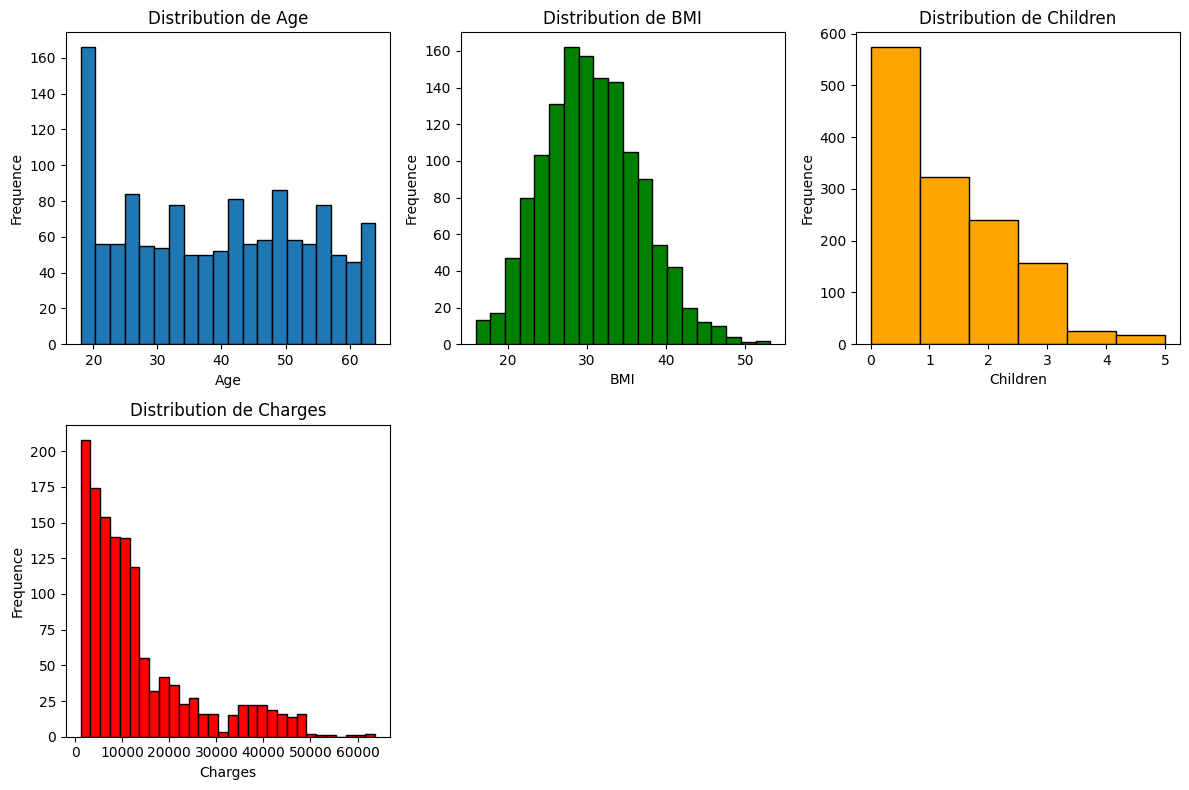

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.title('Distribution de Age')

plt.subplot(2, 3, 2)
plt.hist(df['bmi'], bins=20, edgecolor='black', color='green')
plt.xlabel('BMI')
plt.ylabel('Frequence')
plt.title('Distribution de BMI')

plt.subplot(2, 3, 3)
plt.hist(df['children'], bins=6, edgecolor='black', color='orange')
plt.xlabel('Children')
plt.ylabel('Frequence')
plt.title('Distribution de Children')

plt.subplot(2, 3, 4)
plt.hist(df['charges'], bins=30, edgecolor='black', color='red')
plt.xlabel('Charges')
plt.ylabel('Frequence')
plt.title('Distribution de Charges')

plt.tight_layout()
plt.show()

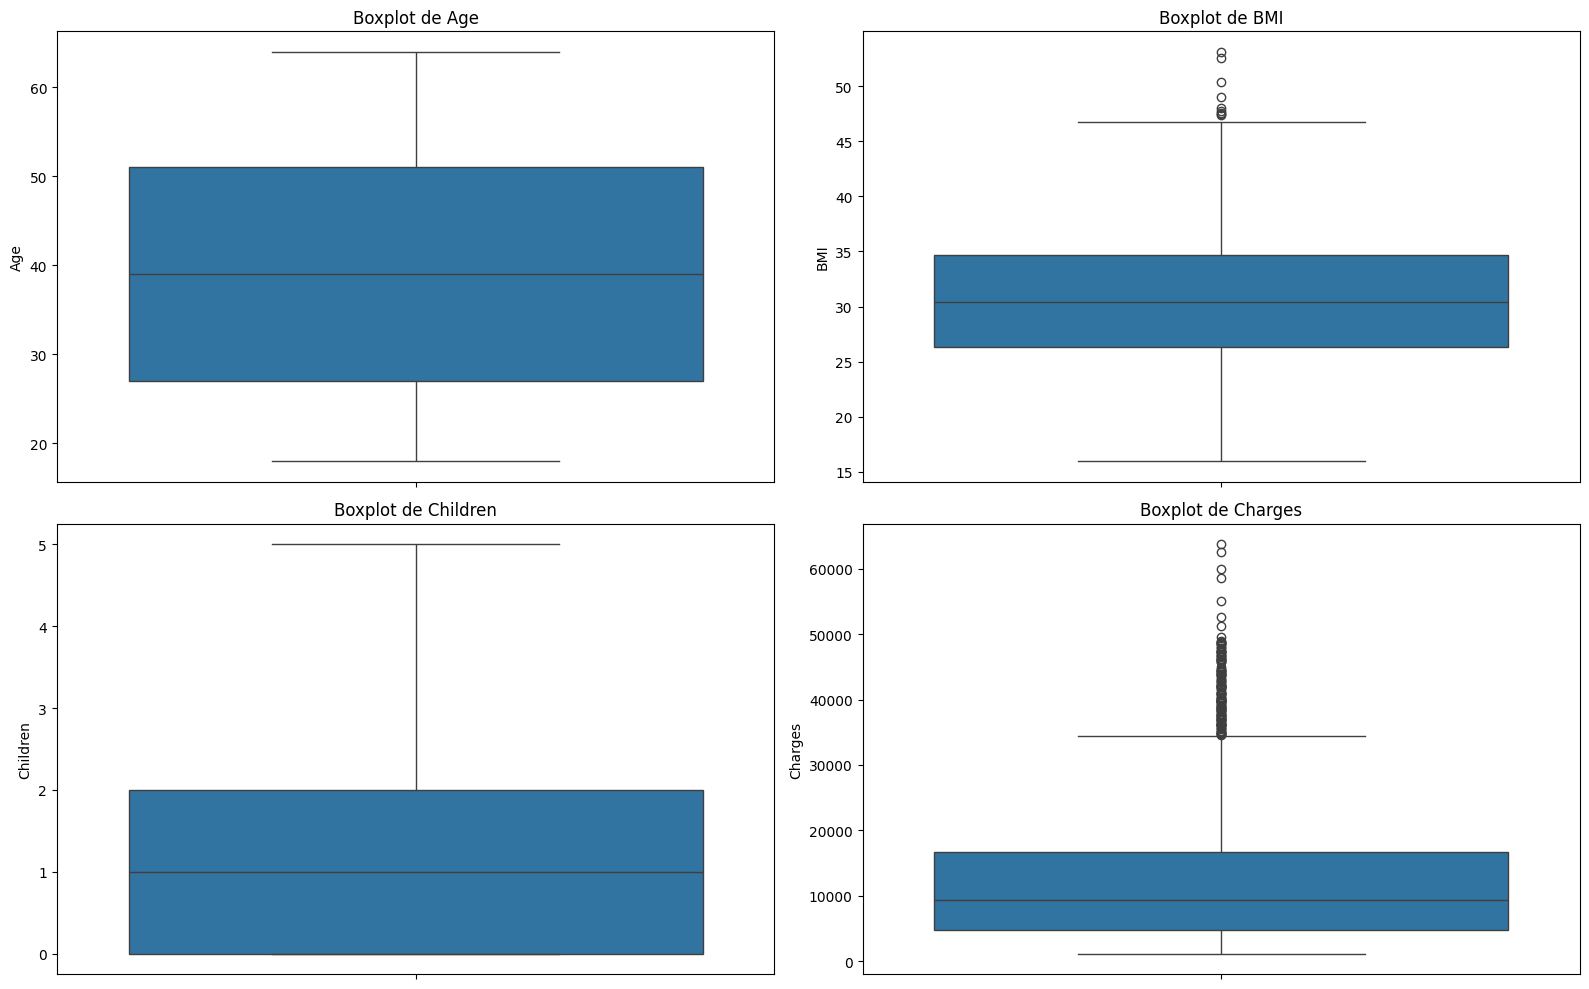

In [16]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Boxplot de Age')
plt.ylabel('Age')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['bmi'])
plt.title('Boxplot de BMI')
plt.ylabel('BMI')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['children'])
plt.title('Boxplot de Children')
plt.ylabel('Children')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['charges'])
plt.title('Boxplot de Charges')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

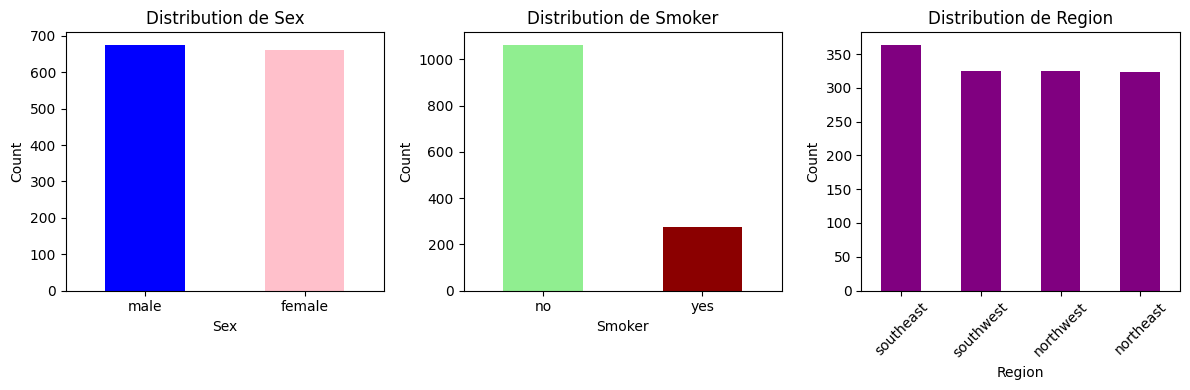

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df['sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution de Sex')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
df['smoker'].value_counts().plot(kind='bar', color=['lightgreen', 'darkred'])
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Distribution de Smoker')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
df['region'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution de Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

In [19]:
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


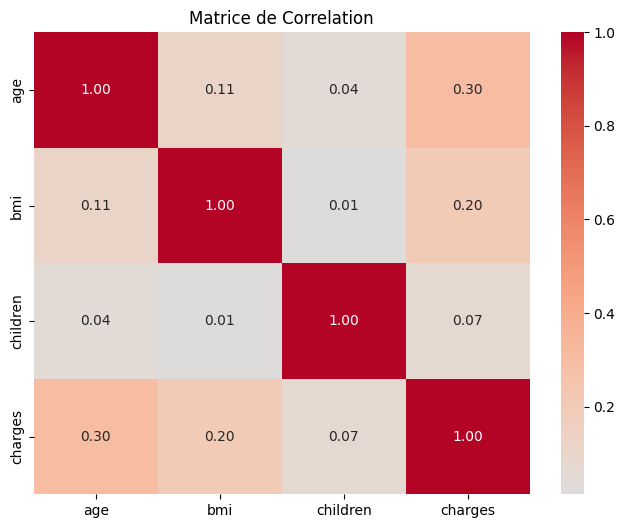

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Correlation')
plt.show()

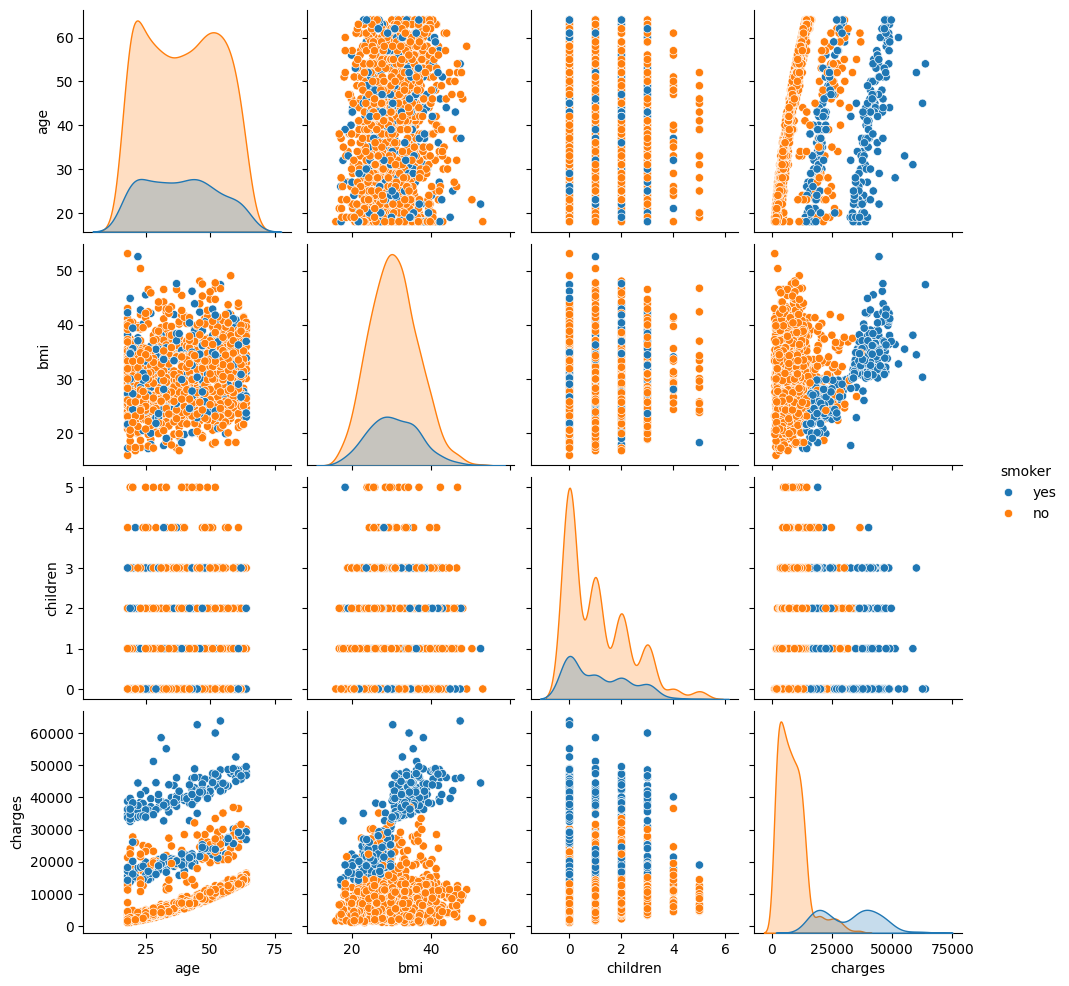

In [21]:
sns.pairplot(df, hue='smoker')
plt.show()

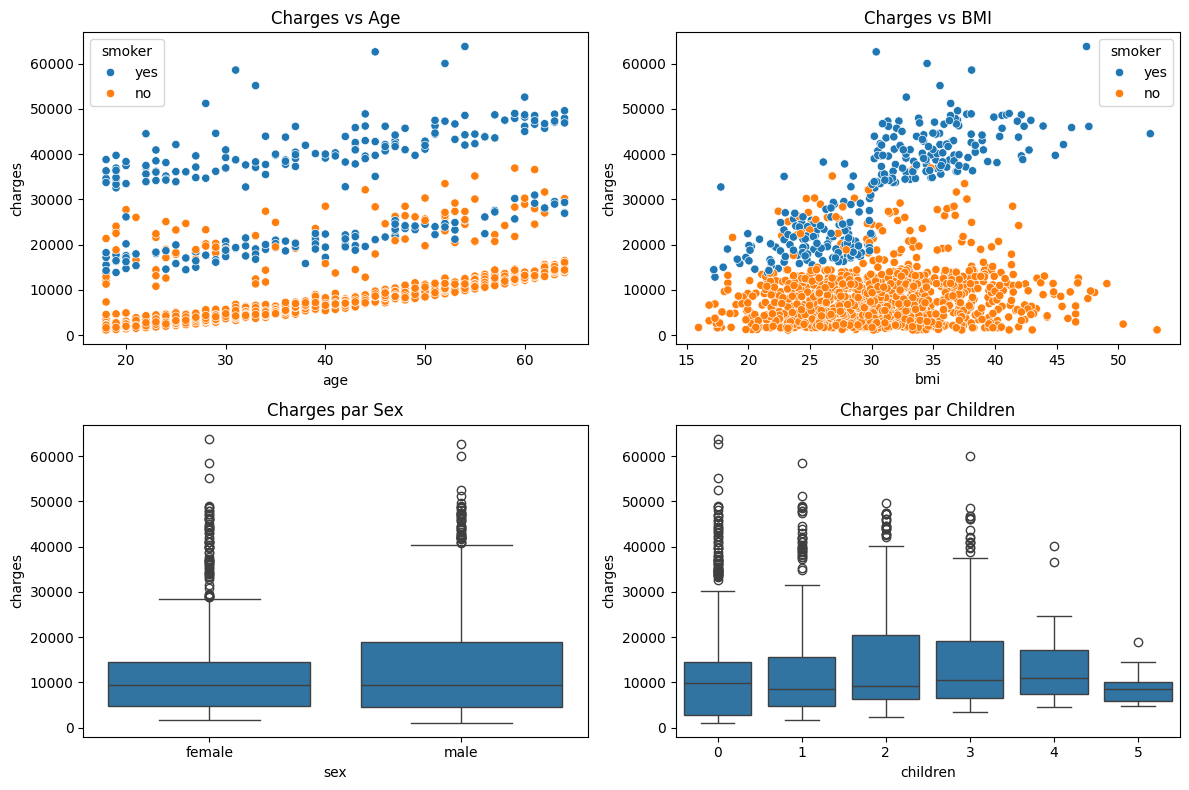

In [22]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title('Charges vs Age')

plt.subplot(2, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('Charges vs BMI')

plt.subplot(2, 2, 3)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges par Sex')

plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Charges par Children')

plt.tight_layout()
plt.show()

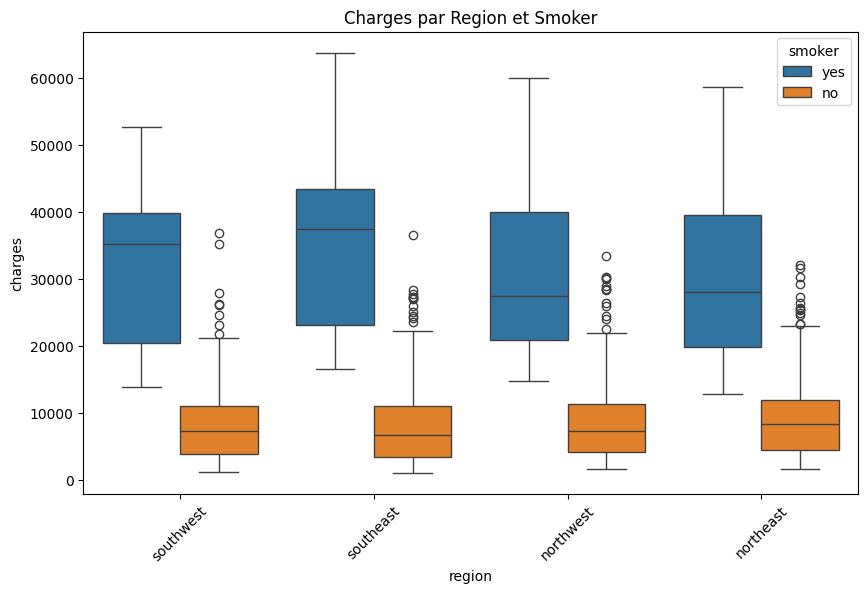

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, hue='smoker')
plt.title('Charges par Region et Smoker')
plt.xticks(rotation=45)
plt.show()

In [24]:
print(df.groupby('smoker')['charges'].mean())

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [25]:
print(df.groupby('sex')['charges'].mean())

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [26]:
print(df.groupby('region')['charges'].mean())

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


## Tâche 3 : Prétraitement des Données

### 3.1 Gestion des valeurs manquantes
Nous allons vérifier s'il y a des valeurs manquantes et les traiter en utilisant l'imputation avec la médiane pour les variables numériques et le mode pour les variables catégoriques.

In [27]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())
print(f"\nPourcentage de valeurs manquantes :")
print((df.isnull().sum() / len(df)) * 100)

from sklearn.impute import SimpleImputer

numeric_columns = df.select_dtypes(include=[np.number]).columns
imputer_numeric = SimpleImputer(strategy='median')

categorical_columns = df.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')

df_clean = df.copy()
if df[numeric_columns].isnull().sum().sum() > 0:
    df_clean[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])
    
if df[categorical_columns].isnull().sum().sum() > 0:
    df_clean[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])

print("\nAprès imputation :")
print(df_clean.isnull().sum())

Valeurs manquantes par colonne :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Pourcentage de valeurs manquantes :
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Après imputation :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### 3.2 Suppression des doublons
Nous allons identifier et supprimer les lignes dupliquées pour éviter le biais dans notre modèle.

In [28]:
print(f"Nombre de lignes avant suppression des doublons : {len(df_clean)}")
print(f"Nombre de doublons : {df_clean.duplicated().sum()}")

df_clean = df_clean.drop_duplicates()
print(f"Nombre de lignes apres suppression des doublons : {len(df_clean)}")

df_clean = df_clean.reset_index(drop=True)
print("Doublons supprimes avec succes")

Nombre de lignes avant suppression des doublons : 1338
Nombre de doublons : 1
Nombre de lignes apres suppression des doublons : 1337
Doublons supprimes avec succes


###  Detection et gestion des valeurs aberrantes
Nous utiliserons plusieurs techniques pour identifier les outliers :
- Méthode IQR (Interquartile Range)
- Z-score (valeurs > 3)
- Visualisation avec des boxplots

In [29]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

from scipy import stats
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

numeric_cols = ['age', 'bmi', 'children', 'charges']

print("DETECTION DES OUTLIERS\n")
outliers_summary = {}

for col in numeric_cols:
    print(f"--- {col.upper()} ---")
    
    outliers_iqr, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f"IQR - Nombre d'outliers : {len(outliers_iqr)}")
    print(f"IQR - Bornes : [{lower:.2f}, {upper:.2f}]")
    
    outliers_zscore = detect_outliers_zscore(df_clean, col)
    print(f"Z-score - Nombre d'outliers : {len(outliers_zscore)}")
    print(f"pourcentage outliers with zscore {len(outliers_zscore)/len(df_clean)}")
    outliers_summary[col] = {
        'iqr_count': len(outliers_iqr),
        'zscore_count': len(outliers_zscore),
        'iqr_indices': outliers_iqr.index.tolist()
    }
    print()

DETECTION DES OUTLIERS

--- AGE ---
IQR - Nombre d'outliers : 0
IQR - Bornes : [-9.00, 87.00]
Z-score - Nombre d'outliers : 0
pourcentage outliers with zscore 0.0

--- BMI ---
IQR - Nombre d'outliers : 9
IQR - Bornes : [13.67, 47.32]
Z-score - Nombre d'outliers : 4
pourcentage outliers with zscore 0.0029917726252804786

--- CHILDREN ---
IQR - Nombre d'outliers : 0
IQR - Bornes : [-3.00, 5.00]
Z-score - Nombre d'outliers : 18
pourcentage outliers with zscore 0.013462976813762155

--- CHARGES ---
IQR - Nombre d'outliers : 139
IQR - Bornes : [-13120.72, 34524.78]
Z-score - Nombre d'outliers : 7
pourcentage outliers with zscore 0.005235602094240838



In [30]:
# plt.figure(figsize=(16, 10))

# for i, col in enumerate(numeric_cols, 1):
#     plt.subplot(2, 2, i)
#     sns.boxplot(y=df_clean[col])
#     plt.title(f'Boxplot de {col} - Outliers détectés')
#     plt.ylabel(col)

# plt.tight_layout()
# plt.show()

# print("SUPPRESSION DES OUTLIERS")
# print(f"Taille avant suppression des outliers : {len(df_clean)}")

# outliers_to_remove = set()

# outliers_bmi, _, _ = detect_outliers_iqr(df_clean, 'bmi')
# outliers_to_remove.update(outliers_bmi.index)

# outliers_charges, _, _ = detect_outliers_iqr(df_clean, 'charges')
# outliers_to_remove.update(outliers_charges.index)

# outliers_ages, _, _ = detect_outliers_iqr(df_clean, 'age')
# outliers_to_remove.update(outliers_ages.index)

# outliers_children, _, _ = detect_outliers_iqr(df_clean, 'children')
# outliers_to_remove.update(outliers_children.index)

# df_clean = df_clean.drop(index=outliers_to_remove)
# # df_clean = df_clean.reset_index(drop=True)
# for i, col in enumerate(numeric_cols, 1):
#     plt.subplot(2, 2, i)
#     sns.boxplot(y=df_clean[col])
#     plt.title(f'Boxplot de {col} - Outliers détectés')
#     plt.ylabel(col)

# plt.tight_layout()
# plt.show()

# print(f"Outliers supprimes : {len(outliers_to_remove)}")
# print(f"Taille apres suppression des outliers : {len(df_clean)}")

### 3.4 Encodage des variables catégoriques
Nous allons encoder les variables catégoriques (sex, smoker, region) en utilisant différentes techniques d'encodage.

In [31]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_encoded = df_clean.copy()

print("ENCODAGE DES VARIABLES CATÉGORIQUES\n")

label_encoder = LabelEncoder()

df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])
print("Sex encoding:")
sex_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(sex_mapping)

df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
print("\nSmoker encoding:")
smoker_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(smoker_mapping)

df_encoded['region_encoded'] = label_encoder.fit_transform(df_encoded['region'])


print(f"\nDataframe shape apres encodage: {df_encoded.shape}")
print("\nPremieres lignes des variables encodees:")
encoded_cols = ['sex', 'sex_encoded', 'smoker', 'smoker_encoded', 'region', 'region_encoded'] 
print(df_encoded[encoded_cols].head())

ENCODAGE DES VARIABLES CATÉGORIQUES

Sex encoding:
{'female': np.int64(0), 'male': np.int64(1)}

Smoker encoding:
{'no': np.int64(0), 'yes': np.int64(1)}

Dataframe shape apres encodage: (1337, 10)

Premieres lignes des variables encodees:
      sex  sex_encoded smoker  smoker_encoded     region  region_encoded
0  female            0    yes               1  southwest               3
1    male            1     no               0  southeast               2
2    male            1     no               0  southeast               2
3    male            1     no               0  northwest               1
4    male            1     no               0  northwest               1


### 3.5 Division des données en ensembles d'entraînement et de test
Nous allons diviser les données en ensembles d'entraînement (80%) et de test (20%) avec train_test_split.

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score

feature_columns = ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded'] 
X = df_encoded[feature_columns]
y = df_encoded['charges']

print("DIVISION DES DONNEES\n")
print(f"Features utilisees: {feature_columns}")
print(f"Target: charges")
print(f"Shape des features (X): {X.shape}")
print(f"Shape de la target (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=None
)

print(f"\nTaille de l'ensemble d'entrainement: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Taille de l'ensemble de test: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nStatistiques de la variable target:")
print(f"Train - charges moyennes: {y_train.mean():.2f}")
print(f"Test - charges moyennes: {y_test.mean():.2f}")
print(f"Train - ecart-type: {y_train.std():.2f}")
print(f"Test - ecart-type: {y_test.std():.2f}")

DIVISION DES DONNEES

Features utilisees: ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']
Target: charges
Shape des features (X): (1337, 6)
Shape de la target (y): (1337,)

Taille de l'ensemble d'entrainement: 1069 (80.0%)
Taille de l'ensemble de test: 268 (20.0%)

Statistiques de la variable target:
Train - charges moyennes: 13030.20
Test - charges moyennes: 14272.01
Train - ecart-type: 11706.53
Test - ecart-type: 13581.03


### 3.6 Normalisation et Standardisation des variables numériques
Nous allons appliquer la normalisation (MinMaxScaler) et la standardisation (StandardScaler) sur les variables numériques pour harmoniser les échelles.

NORMALISATION ET STANDARDISATION

Variables numériques à scaler: ['age', 'bmi', 'children', 'sex_encoded', 'region_encoded', 'smoker_encoded']
MinMax Scaler appliqué:
Statistiques des données normalisées (train):
               age          bmi     children  sex_encoded  region_encoded  \
count  1069.000000  1069.000000  1069.000000  1069.000000     1069.000000   
mean      0.460833     0.392263     0.216838     0.514500        0.509199   
std       0.304317     0.162815     0.238945     0.500024        0.368105   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.195652     0.274953     0.000000     0.000000        0.333333   
50%       0.456522     0.383105     0.200000     1.000000        0.666667   
75%       0.717391     0.496906     0.400000     1.000000        0.666667   
max       1.000000     1.000000     1.000000     1.000000        1.000000   

       smoker_encoded  
count     1069.000000  
mean         0.200187  
std          0.400328

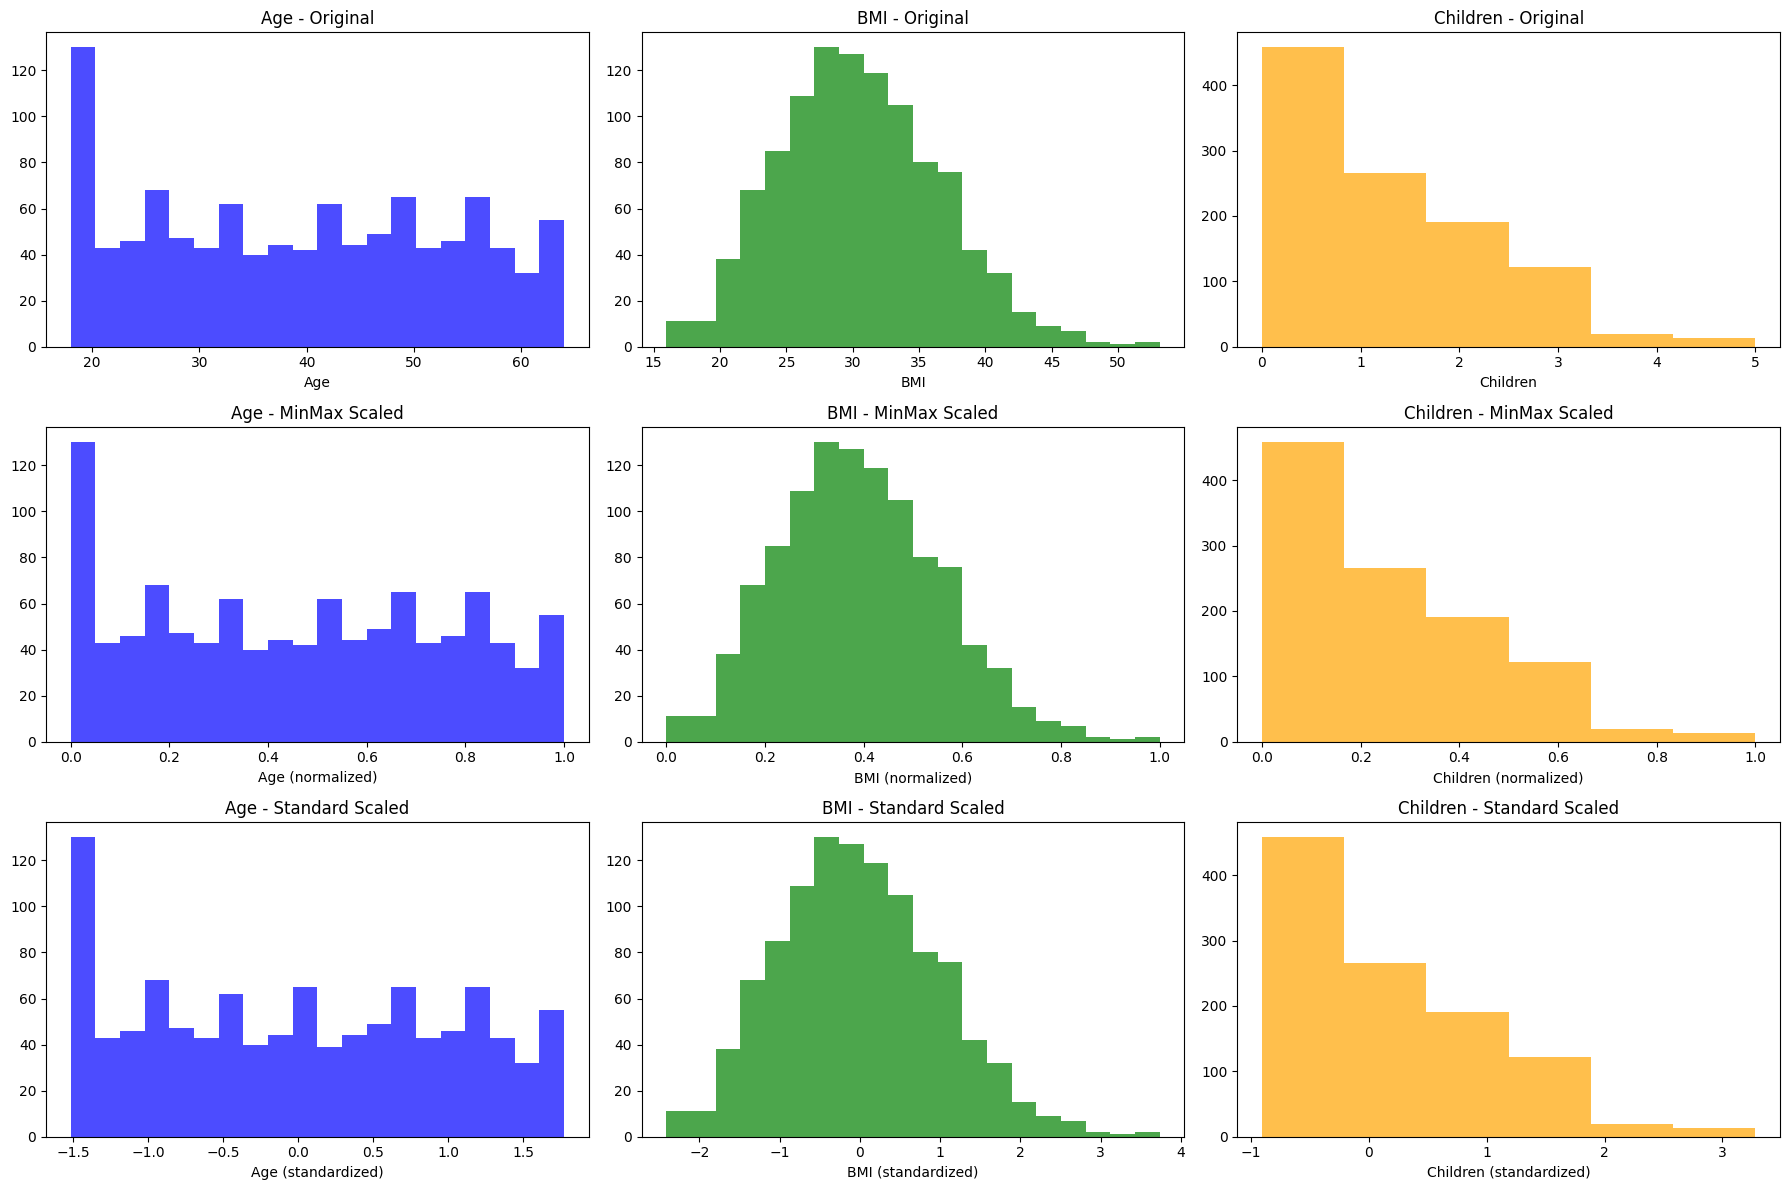


RESUME DU PRETRAITEMENT
✓ Valeurs manquantes traitees
✓ Doublons supprimes
✓ Outliers supprimes
✓ Variables categorique encodees
✓ Donnees divisees (80% train / 20% test)
✓ Features normalisees et standardisees

Datasets finaux:
- X_train original: (1069, 6)
- X_train normalized: (1069, 6)
- X_train standardized: (1069, 6)
- y_train: (1069,)


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_features = ['age', 'bmi', 'children', 'sex_encoded', 'region_encoded', 'smoker_encoded']
print("NORMALISATION ET STANDARDISATION\n")
print(f"Variables numériques à scaler: {numeric_features}")

minmax_scaler = MinMaxScaler()

X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

X_train_minmax[numeric_features] = minmax_scaler.fit_transform(X_train[numeric_features])
X_test_minmax[numeric_features] = minmax_scaler.transform(X_test[numeric_features])

print("MinMax Scaler appliqué:")
print("Statistiques des données normalisées (train):")
print(X_train_minmax[numeric_features].describe())

standard_scaler = StandardScaler()

X_train_standard = X_train.copy()
X_test_standard = X_test.copy()

X_train_standard[numeric_features] = standard_scaler.fit_transform(X_train[numeric_features])
X_test_standard[numeric_features] = standard_scaler.transform(X_test[numeric_features])

print(f"\nStandard Scaler applique:")
print("Statistiques des données standardisees (train):")
print(X_train_standard[numeric_features].describe())

plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.hist(X_train['age'], bins=20, alpha=0.7, color='blue')
plt.title('Age - Original')
plt.xlabel('Age')

plt.subplot(3, 3, 2)
plt.hist(X_train['bmi'], bins=20, alpha=0.7, color='green')
plt.title('BMI - Original')
plt.xlabel('BMI')

plt.subplot(3, 3, 3)
plt.hist(X_train['children'], bins=6, alpha=0.7, color='orange')
plt.title('Children - Original')
plt.xlabel('Children')

plt.subplot(3, 3, 4)
plt.hist(X_train_minmax['age'], bins=20, alpha=0.7, color='blue')
plt.title('Age - MinMax Scaled')
plt.xlabel('Age (normalized)')

plt.subplot(3, 3, 5)
plt.hist(X_train_minmax['bmi'], bins=20, alpha=0.7, color='green')
plt.title('BMI - MinMax Scaled')
plt.xlabel('BMI (normalized)')

plt.subplot(3, 3, 6)
plt.hist(X_train_minmax['children'], bins=6, alpha=0.7, color='orange')
plt.title('Children - MinMax Scaled')
plt.xlabel('Children (normalized)')

plt.subplot(3, 3, 7)
plt.hist(X_train_standard['age'], bins=20, alpha=0.7, color='blue')
plt.title('Age - Standard Scaled')
plt.xlabel('Age (standardized)')

plt.subplot(3, 3, 8)
plt.hist(X_train_standard['bmi'], bins=20, alpha=0.7, color='green')
plt.title('BMI - Standard Scaled')
plt.xlabel('BMI (standardized)')

plt.subplot(3, 3, 9)
plt.hist(X_train_standard['children'], bins=6, alpha=0.7, color='orange')
plt.title('Children - Standard Scaled')
plt.xlabel('Children (standardized)')

plt.tight_layout()
plt.show()

print(f"\nRESUME DU PRETRAITEMENT")
print(f"✓ Valeurs manquantes traitees")
print(f"✓ Doublons supprimes")
print(f"✓ Outliers supprimes")
print(f"✓ Variables categorique encodees")
print(f"✓ Donnees divisees (80% train / 20% test)")
print(f"✓ Features normalisees et standardisees")
print(f"\nDatasets finaux:")
print(f"- X_train original: {X_train.shape}")
print(f"- X_train normalized: {X_train_minmax.shape}")
print(f"- X_train standardized: {X_train_standard.shape}")
print(f"- y_train: {y_train.shape}")

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [35]:
pipe1 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

In [36]:
pipe1.fit(X_train_minmax, y_train)


,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [37]:
y_pred = pipe1.predict(X_test_minmax)

In [38]:

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


RMSE: 35493102.61165054
MAE: 4182.3531552883
R²: 0.8068466322629111


In [39]:
joblib.dump(pipe1, "linear_regression_pipeline.pkl")

results1 = {
    "model": "LinearRegression",
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}



In [40]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe2 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(random_state=42))
])

pipe2.fit(X_train_minmax, y_train)
y_pred = pipe2.predict(X_test_minmax)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

joblib.dump(pipe2, "random_forest_pipeline.pkl")

results2 = {
    "model": "RandomForestRegressor",
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}

print(results1, results2)


RMSE: 21749239.39635143
MAE: 2583.1227739029846
R²: 0.8816406984452664
{'model': 'LinearRegression', 'rmse': 35493102.61165054, 'mae': 4182.3531552883, 'r2': 0.8068466322629111} {'model': 'RandomForestRegressor', 'rmse': 21749239.39635143, 'mae': 2583.1227739029846, 'r2': 0.8816406984452664}


In [41]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import xgboost
from xgboost import XGBRegressor

import joblib

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import xgboost as xgb

pipe3 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("regressor", XGBRegressor(random_state=42))
])

pipe3.fit(X_train_minmax, y_train)


,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [42]:
y_pred = pipe3.predict(X_test_minmax)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

joblib.dump(pipe3, "xgbregressor_pipeline.pkl")

results3 = {
    "model": "XGBRegressor",
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}



RMSE: 24254279.912456233
MAE: 2841.252678354059
R²: 0.868008274779811


In [43]:
from sklearn.svm import SVR

pipe4 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("regressor", SVR())
])

pipe4.fit(X_train_minmax, y_train)

y_pred = pipe4.predict(X_test_minmax)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

joblib.dump(pipe4, "svr_pipeline.pkl")

results4 = {
    "model": "SVR",
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}

# Correction: utilisation correcte de extend
results = []
results.extend([results1, results2, results3, results4])
print("Résultats de tous les modèles:")
for result in results:
    print(f"{result['model']}: RMSE={result['rmse']:.2f}, MAE={result['mae']:.2f}, R²={result['r2']:.3f}")

joblib.dump(results, "all_models_results.pkl")

RMSE: 207623079.60653082
MAE: 9252.803702593174
R²: -0.12988423369850421
Résultats de tous les modèles:
LinearRegression: RMSE=35493102.61, MAE=4182.35, R²=0.807
RandomForestRegressor: RMSE=21749239.40, MAE=2583.12, R²=0.882
XGBRegressor: RMSE=24254279.91, MAE=2841.25, R²=0.868
SVR: RMSE=207623079.61, MAE=9252.80, R²=-0.130


['all_models_results.pkl']

# Feature Story 2 : Optimisation des Hyperparamètres avec GridSearchCV

GridSearchCV avec validation croisée (5 folds) pour optimiser les hyperparamètres des modèles Random Forest et XGBoost, puis comparer les performances avant et après optimisation.

In [44]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import time

print("OPTIMISATION DES HYPERPARAMETRES AVEC GRIDSEARCHCV\n")

OPTIMISATION DES HYPERPARAMETRES AVEC GRIDSEARCHCV



### 1. Optimisation du modèle Random Forest

Nous allons définir une grille de recherche pour Random Forest avec les hyperparamètres :
- **n_estimators** : nombre d'arbres dans la forêt
- **max_depth** : profondeur maximale des arbres
- **min_samples_split** : nombre minimum d'échantillons requis pour diviser un nœud

In [45]:
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

print("RANDOM FOREST - Optimisation des hyperparamètres")
print(f"Grille de paramètres: {rf_param_grid}")
print(f"Nombre total de combinaisons: {len(rf_param_grid['regressor__n_estimators']) * len(rf_param_grid['regressor__max_depth']) * len(rf_param_grid['regressor__min_samples_split'])}")

print("\nPerformance AVANT optimisation")
rf_baseline = RandomForestRegressor(random_state=42)
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', rf_baseline)
])

rf_scores = cross_val_score(rf_pipeline, X_train_minmax, y_train, 
                                   cv=5, scoring='neg_mean_squared_error')
rf_mae_scores = cross_val_score(rf_pipeline, X_train_minmax, y_train, 
                                        cv=5, scoring='neg_mean_absolute_error')
rf_r2_scores = cross_val_score(rf_pipeline, X_train_minmax, y_train, 
                                       cv=5, scoring='r2')

print(f"RMSE moyen (CV): {np.sqrt(-rf_scores.mean()):.2f} (±{np.sqrt(rf_scores.std()):.2f})")
print(f"MAE moyen (CV): {-rf_mae_scores.mean():.2f} (±{rf_mae_scores.std():.2f})")
print(f"R² moyen (CV): {rf_r2_scores.mean():.3f} (±{rf_r2_scores.std():.3f})")

RANDOM FOREST - Optimisation des hyperparamètres
Grille de paramètres: {'regressor__n_estimators': [50, 100, 200], 'regressor__max_depth': [10, 20], 'regressor__min_samples_split': [2, 5, 10]}
Nombre total de combinaisons: 18

Performance AVANT optimisation
RMSE moyen (CV): 5021.26 (±1822.66)
MAE moyen (CV): 2793.68 (±226.78)
R² moyen (CV): 0.816 (±0.011)


In [46]:
# GridSearchCV pour Random Forest avec validation croisée 5-fold
print("\n--- Optimisation avec GridSearchCV ---")
start_time = time.time()

rf_grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train_minmax, y_train)

end_time = time.time()
print(f"\nTemps d execution: {end_time - start_time:.2f} secondes")

print(f"\nMeilleurs hyperparametres Random Forest:")
print(f"{rf_grid_search.best_params_}")

print(f"\nMeilleur score (RMSE) avec validation croisée: {np.sqrt(-rf_grid_search.best_score_):.2f}")

rf_optimized_predictions = rf_grid_search.predict(X_test_minmax)
rf_optimized_rmse = np.sqrt(mean_squared_error(y_test, rf_optimized_predictions))
rf_optimized_mae = mean_absolute_error(y_test, rf_optimized_predictions)
rf_optimized_r2 = r2_score(y_test, rf_optimized_predictions)

print(f"\n--- Performance APRÈS optimisation (ensemble de test) ---")
print(f"RMSE: {rf_optimized_rmse:.2f}")
print(f"MAE: {rf_optimized_mae:.2f}")
print(f"R²: {rf_optimized_r2:.3f}")


--- Optimisation avec GridSearchCV ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Temps d execution: 6.93 secondes

Meilleurs hyperparametres Random Forest:
{'regressor__max_depth': 20, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}

Meilleur score (RMSE) avec validation croisée: 4794.55

--- Performance APRÈS optimisation (ensemble de test) ---
RMSE: 4483.18
MAE: 2567.90
R²: 0.891


### 2. Optimisation du modèle XGBoost

Nous allons définir une grille de recherche pour XGBoost avec les hyperparamètres :
- **learning_rate** : taux d'apprentissage
- **max_depth** : profondeur maximale des arbres
- **subsample** : fraction d'échantillons utilisée pour chaque arbre

In [47]:
# Création du pipeline pour XGBoost
xgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(random_state=42))
])

# Définition de la grille d'hyperparamètres pour XGBoost
xgb_param_grid = {
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 6, 10],
    'regressor__subsample': [0.8, 0.9, 1.0]
}

print("\nXGBOOST - Optimisation des hyperparamètres")
print(f"Grille de paramètres: {xgb_param_grid}")
print(f"Nombre total de combinaisons: {len(xgb_param_grid['regressor__learning_rate']) * len(xgb_param_grid['regressor__max_depth']) * len(xgb_param_grid['regressor__subsample'])}")

# Performance du modèle XGBoost AVANT optimisation
print("\n--- Performance AVANT optimisation ---")
xgb_baseline = XGBRegressor(random_state=42)
xgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', xgb_baseline)
])

xgb_scores = cross_val_score(xgb_pipeline, X_train_minmax, y_train, 
                                     cv=5, scoring='neg_mean_squared_error')
xgb_mae_scores = cross_val_score(xgb_pipeline, X_train_minmax, y_train, 
                                         cv=5, scoring='neg_mean_absolute_error')
xgb_r2_scores = cross_val_score(xgb_pipeline, X_train_minmax, y_train, 
                                        cv=5, scoring='r2')

print(f"RMSE moyen (CV): {np.sqrt(-xgb_scores.mean()):.2f} (±{np.sqrt(xgb_scores.std()):.2f})")
print(f"MAE moyen (CV): {-xgb_mae_scores.mean():.2f} (±{xgb_mae_scores.std():.2f})")
print(f"R² moyen (CV): {xgb_r2_scores.mean():.3f} (±{xgb_r2_scores.std():.3f})")


XGBOOST - Optimisation des hyperparamètres
Grille de paramètres: {'regressor__learning_rate': [0.01, 0.1, 0.2], 'regressor__max_depth': [3, 6, 10], 'regressor__subsample': [0.8, 0.9, 1.0]}
Nombre total de combinaisons: 27

--- Performance AVANT optimisation ---
RMSE moyen (CV): 5460.67 (±1786.52)
MAE moyen (CV): 3102.71 (±171.23)
R² moyen (CV): 0.782 (±0.016)


In [48]:
# GridSearchCV pour XGBoost avec validation croisee 5-fold
print("\n--- Optimisation avec GridSearchCV ---")
start_time = time.time()

xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

xgb_grid_search.fit(X_train_minmax, y_train)

end_time = time.time()
print(f"\nTemps d'exécution: {end_time - start_time:.2f} secondes")

print(f"\nMeilleurs hyperparamètres XGBoost:")
print(f"{xgb_grid_search.best_params_}")

print(f"\nMeilleur score (RMSE) avec validation croisée: {np.sqrt(-xgb_grid_search.best_score_):.2f}")

# Performance du modèle optimisé sur l'ensemble de test
xgb_optimized_predictions = xgb_grid_search.predict(X_test_minmax)
xgb_optimized_rmse = np.sqrt(mean_squared_error(y_test, xgb_optimized_predictions))
xgb_optimized_mae = mean_absolute_error(y_test, xgb_optimized_predictions)
xgb_optimized_r2 = r2_score(y_test, xgb_optimized_predictions)

print(f"\n--- Performance APRÈS optimisation (ensemble de test) ---")
print(f"RMSE: {xgb_optimized_rmse:.2f}")
print(f"MAE: {xgb_optimized_mae:.2f}")
print(f"R²: {xgb_optimized_r2:.3f}")


--- Optimisation avec GridSearchCV ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Temps d'exécution: 2.52 secondes

Meilleurs hyperparamètres XGBoost:
{'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__subsample': 1.0}

Meilleur score (RMSE) avec validation croisée: 4696.66

--- Performance APRÈS optimisation (ensemble de test) ---
RMSE: 4255.90
MAE: 2502.49
R²: 0.901


### 3. Comparaison des performances : Avant vs Après optimisation

Tableau de comparaison des performances de tous les modèles avec leurs versions optimisées

In [49]:
rf_pipeline.fit(X_train_minmax, y_train)
xgb_pipeline.fit(X_train_minmax, y_train)

rf_pred = rf_pipeline.predict(X_test_minmax)
xgb_pred = xgb_pipeline.predict(X_test_minmax)

rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae_test = mean_absolute_error(y_test, rf_pred)
rf_r2_test = r2_score(y_test, rf_pred)

xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae_test = mean_absolute_error(y_test, xgb_pred)
xgb_r2_test = r2_score(y_test, xgb_pred)

results_comparison = pd.DataFrame({
    'Modèle': [
        'Random Forest (Baseline)', 'Random Forest (Optimisé)', 
        'XGBoost (Baseline)', 'XGBoost (Optimisé)'
    ],
    'RMSE': [
        rf_rmse_test, rf_optimized_rmse,
        xgb_rmse_test, xgb_optimized_rmse
    ],
    'MAE': [
        rf_mae_test, rf_optimized_mae,
        xgb_mae_test, xgb_optimized_mae
    ],
    'R²': [
        rf_r2_test, rf_optimized_r2,
        xgb_r2_test, xgb_optimized_r2
    ]
})

print("TABLEAU DE COMPARAISON DES PERFORMANCES\n")
print(results_comparison.round(3))

# Calcul des améliorations
rf_rmse_improvement = ((rf_rmse_test - rf_optimized_rmse) / rf_rmse_test) * 100
rf_mae_improvement = ((rf_mae_test - rf_optimized_mae) / rf_mae_test) * 100
rf_r2_improvement = ((rf_optimized_r2 - rf_r2_test) / rf_r2_test) * 100

xgb_rmse_improvement = ((xgb_rmse_test - xgb_optimized_rmse) / xgb_rmse_test) * 100
xgb_mae_improvement = ((xgb_mae_test - xgb_optimized_mae) / xgb_mae_test) * 100
xgb_r2_improvement = ((xgb_optimized_r2 - xgb_r2_test) / xgb_r2_test) * 100

print(f"\nAMELIORATION DES PERFORMANCES")
print(f"\nRandom Forest:")
print(f"  • RMSE: {rf_rmse_improvement:+.2f}%")
print(f"  • MAE: {rf_mae_improvement:+.2f}%") 
print(f"  • R²: {rf_r2_improvement:+.2f}%")

print(f"\nXGBoost:")
print(f"  • RMSE: {xgb_rmse_improvement:+.2f}%")
print(f"  • MAE: {xgb_mae_improvement:+.2f}%")
print(f"  • R²: {xgb_r2_improvement:+.2f}%")

TABLEAU DE COMPARAISON DES PERFORMANCES

                     Modèle      RMSE       MAE     R²
0  Random Forest (Baseline)  4663.608  2583.123  0.882
1  Random Forest (Optimisé)  4483.178  2567.901  0.891
2        XGBoost (Baseline)  4924.863  2841.253  0.868
3        XGBoost (Optimisé)  4255.898  2502.491  0.901

AMELIORATION DES PERFORMANCES

Random Forest:
  • RMSE: +3.87%
  • MAE: +0.59%
  • R²: +1.02%

XGBoost:
  • RMSE: +13.58%
  • MAE: +11.92%
  • R²: +3.85%


### 4. Visualisation des comparaisons de performances

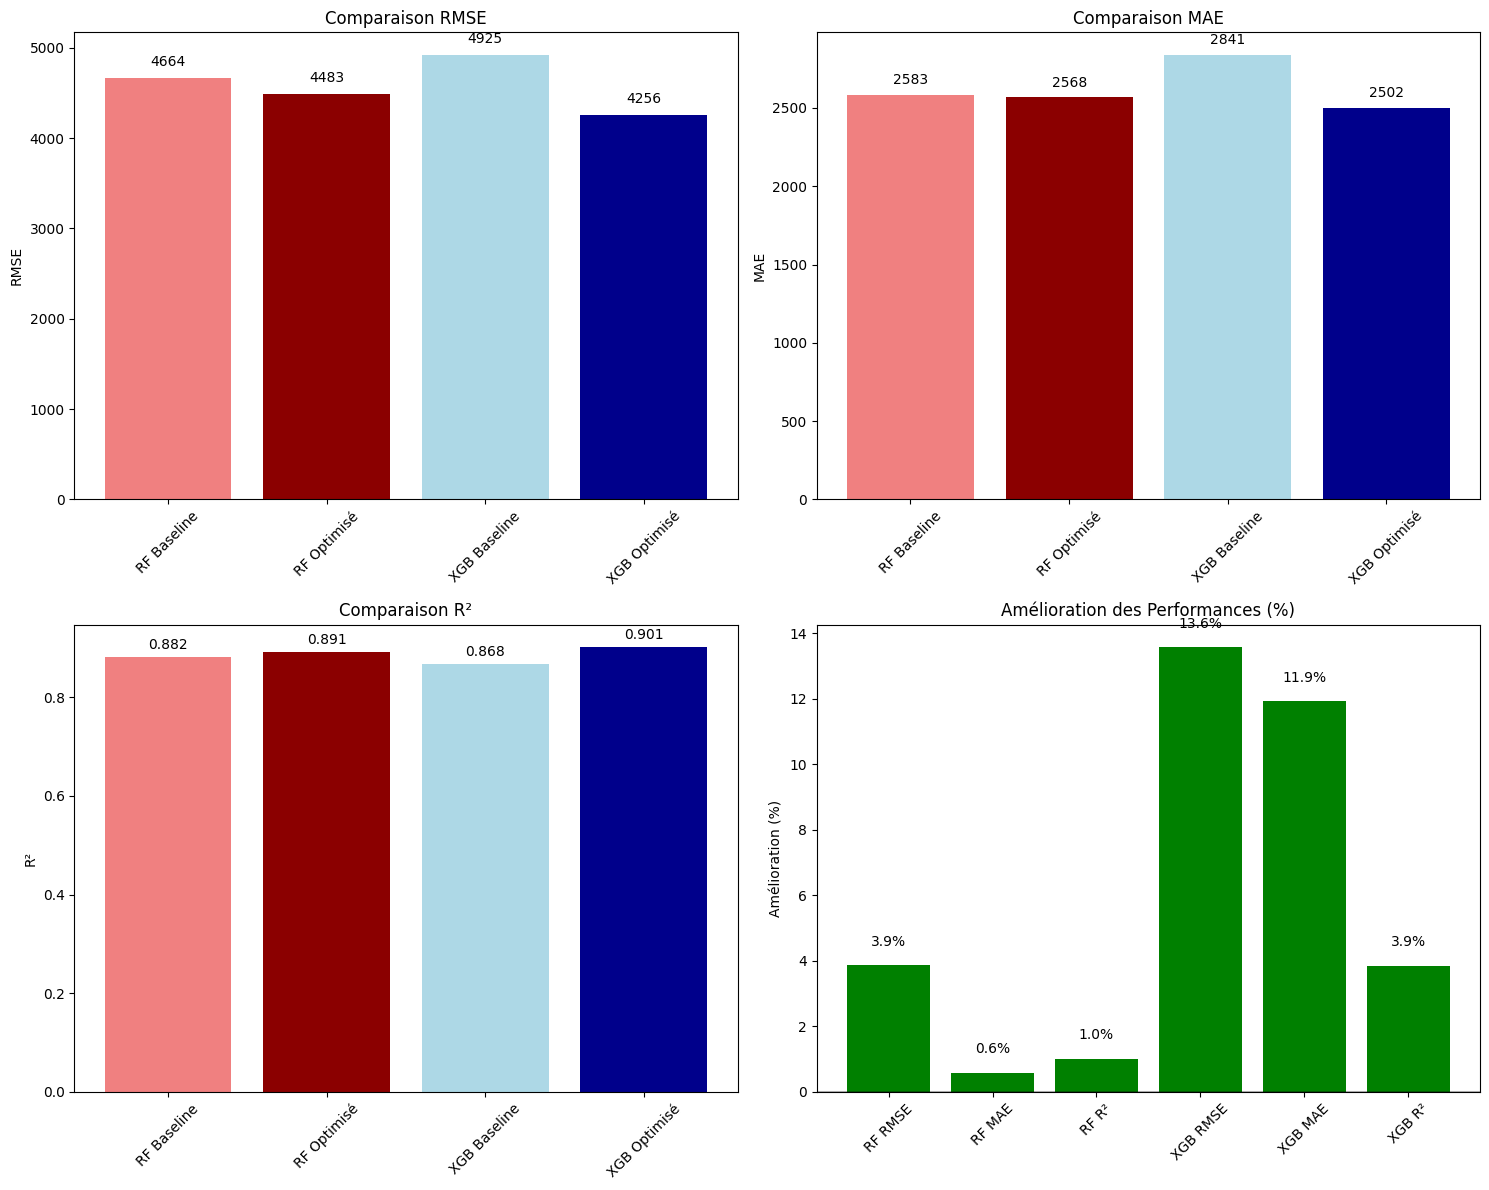

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graphique 1: Comparaison RMSE
models = ['RF Baseline', 'RF Optimisé', 'XGB Baseline', 'XGB Optimisé']
rmse_values = [rf_rmse_test, rf_optimized_rmse, xgb_rmse_test, xgb_optimized_rmse]
colors = ['lightcoral', 'darkred', 'lightblue', 'darkblue']

axes[0,0].bar(models, rmse_values, color=colors)
axes[0,0].set_title('Comparaison RMSE')
axes[0,0].set_ylabel('RMSE')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(rmse_values):
    axes[0,0].text(i, v + 100, f'{v:.0f}', ha='center', va='bottom')

# Graphique 2: Comparaison MAE
mae_values = [rf_mae_test, rf_optimized_mae, xgb_mae_test, xgb_optimized_mae]
axes[0,1].bar(models, mae_values, color=colors)
axes[0,1].set_title('Comparaison MAE')
axes[0,1].set_ylabel('MAE')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(mae_values):
    axes[0,1].text(i, v + 50, f'{v:.0f}', ha='center', va='bottom')

# Graphique 3: Comparaison R²
r2_values = [rf_r2_test, rf_optimized_r2, xgb_r2_test, xgb_optimized_r2]
axes[1,0].bar(models, r2_values, color=colors)
axes[1,0].set_title('Comparaison R²')
axes[1,0].set_ylabel('R²')
axes[1,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(r2_values):
    axes[1,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Graphique 4: Pourcentage d'amélioration
improvements = [rf_rmse_improvement, rf_mae_improvement, rf_r2_improvement, 
                xgb_rmse_improvement, xgb_mae_improvement, xgb_r2_improvement]
improvement_labels = ['RF RMSE', 'RF MAE', 'RF R²', 'XGB RMSE', 'XGB MAE', 'XGB R²']
improvement_colors = ['red' if x < 0 else 'green' for x in improvements]

axes[1,1].bar(improvement_labels, improvements, color=improvement_colors)
axes[1,1].set_title('Amélioration des Performances (%)')
axes[1,1].set_ylabel('Amélioration (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
for i, v in enumerate(improvements):
    axes[1,1].text(i, v + 0.5 if v >= 0 else v - 0.5, f'{v:.1f}%', ha='center', va='bottom' if v >= 0 else 'top')

plt.tight_layout()
plt.show()

In [51]:
print("=== RÉENTRAÎNEMENT DES MODÈLES OPTIMISÉS ===\n")

print("Réentraînement du Random Forest avec les meilleurs hyperparamètres...")
# Extraire les paramètres sans le préfixe 'regressor__'
rf_best_params = {k.replace('regressor__', ''): v for k, v in rf_grid_search.best_params_.items()}

rf_final_model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(**rf_best_params, random_state=42))
])

rf_final_model.fit(X_train_minmax, y_train)

print("Reentrainement du XGBoost avec les meilleurs hyperparamètres...")
# Extraire les paramètres sans le préfixe 'regressor__'
xgb_best_params = {k.replace('regressor__', ''): v for k, v in xgb_grid_search.best_params_.items()}

xgb_final_model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(**xgb_best_params, random_state=42))
])

xgb_final_model.fit(X_train_minmax, y_train)

# Prédictions sur l'ensemble de test
rf_final_pred = rf_final_model.predict(X_test_minmax)
xgb_final_pred = xgb_final_model.predict(X_test_minmax)

# Calcul des métriques finales
rf_final_rmse = np.sqrt(mean_squared_error(y_test, rf_final_pred))
rf_final_mae = mean_absolute_error(y_test, rf_final_pred)
rf_final_r2 = r2_score(y_test, rf_final_pred)

xgb_final_rmse = np.sqrt(mean_squared_error(y_test, xgb_final_pred))
xgb_final_mae = mean_absolute_error(y_test, xgb_final_pred)
xgb_final_r2 = r2_score(y_test, xgb_final_pred)

print(f"\n=== PERFORMANCES FINALES ===")
print(f"\nRandom Forest Optimisé:")
print(f"  RMSE: {rf_final_rmse:.2f}")
print(f"  MAE: {rf_final_mae:.2f}")
print(f"  R²: {rf_final_r2:.3f}")

print(f"\nXGBoost Optimisé:")
print(f"  RMSE: {xgb_final_rmse:.2f}")
print(f"  MAE: {xgb_final_mae:.2f}")
print(f"  R²: {xgb_final_r2:.3f}")

# Sauvegarde des modèles
import joblib

joblib.dump(rf_final_model, "random_forest_optimized_pipeline.pkl")
joblib.dump(xgb_final_model, "xgboost_optimized_pipeline.pkl")

optimized_results = {
    "random_forest_optimized": {
        "model": "RandomForest_Optimized",
        "hyperparameters": rf_grid_search.best_params_,
        "rmse": rf_final_rmse,
        "mae": rf_final_mae,
        "r2": rf_final_r2
    },
    "xgboost_optimized": {
        "model": "XGBoost_Optimized", 
        "hyperparameters": xgb_grid_search.best_params_,
        "rmse": xgb_final_rmse,
        "mae": xgb_final_mae,
        "r2": xgb_final_r2
    }
}

joblib.dump(optimized_results, "optimized_models_results.pkl")

print(f"\n✓ Modèles sauvegardés:")
print(f"  • random_forest_optimized_pipeline.pkl")
print(f"  • xgboost_optimized_pipeline.pkl")
print(f"  • optimized_models_results.pkl")

# Comparaison finale avec tous les modèles précédents
print(f"\n=== CLASSEMENT FINAL DES MODÈLES ===")
all_models_final = [
    ("Linear Regression", results1['rmse'], results1['mae'], results1['r2']),
    ("Random Forest (baseline)", rf_rmse_test, rf_mae_test, rf_r2_test),
    ("Random Forest (optimisé)", rf_final_rmse, rf_final_mae, rf_final_r2),
    ("XGBoost (baseline)", xgb_rmse_test, xgb_mae_test, xgb_r2_test),
    ("XGBoost (optimisé)", xgb_final_rmse, xgb_final_mae, xgb_final_r2),
    ("SVR", results4['rmse'], results4['mae'], results4['r2'])
]

# Trier par R² décroissant (meilleure performance)
all_models_final.sort(key=lambda x: x[3], reverse=True)

for i, (name, rmse, mae, r2) in enumerate(all_models_final, 1):
    print(f"{i}. {name:25} | RMSE: {rmse:7.2f} | MAE: {mae:7.2f} | R²: {r2:.3f}")

print(f"\n🏆 Meilleur modèle: {all_models_final[0][0]} avec R² = {all_models_final[0][3]:.3f}")

=== RÉENTRAÎNEMENT DES MODÈLES OPTIMISÉS ===

Réentraînement du Random Forest avec les meilleurs hyperparamètres...
Reentrainement du XGBoost avec les meilleurs hyperparamètres...

=== PERFORMANCES FINALES ===

Random Forest Optimisé:
  RMSE: 4483.18
  MAE: 2567.90
  R²: 0.891

XGBoost Optimisé:
  RMSE: 4255.90
  MAE: 2502.49
  R²: 0.901

✓ Modèles sauvegardés:
  • random_forest_optimized_pipeline.pkl
  • xgboost_optimized_pipeline.pkl
  • optimized_models_results.pkl

=== CLASSEMENT FINAL DES MODÈLES ===
1. XGBoost (optimisé)        | RMSE: 4255.90 | MAE: 2502.49 | R²: 0.901
2. Random Forest (optimisé)  | RMSE: 4483.18 | MAE: 2567.90 | R²: 0.891
3. Random Forest (baseline)  | RMSE: 4663.61 | MAE: 2583.12 | R²: 0.882
4. XGBoost (baseline)        | RMSE: 4924.86 | MAE: 2841.25 | R²: 0.868
5. Linear Regression         | RMSE: 35493102.61 | MAE: 4182.35 | R²: 0.807
6. SVR                       | RMSE: 207623079.61 | MAE: 9252.80 | R²: -0.130

🏆 Meilleur modèle: XGBoost (optimisé) avec R² 